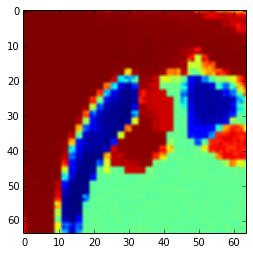

In [8]:
#C3
%matplotlib inline
from IPython.display import display
from matplotlib.pylab import *
from scipy.special import *

I=map(lambda v:transpose(array([v],dtype='float64')),[[0,0,0,0],[0,0,0,1],[0,0,1,0],[0,0,1,1],[0,1,0,0]])
O=map(lambda v:transpose(array([v],dtype='float64')),[[0,0,0,0],[0,0,0,1],[0,0,1,0],[0,1,0,0],[1,0,0,0]])

if True:
    HAu = normal(size=(64,64))
    HAs = ones(shape(HAu))

    HBu = zeros((64,1))
    HBs = ones(shape(HBu))
    
    GAu = normal(size=(64,64))
    GAs = ones(shape(GAu))

    GBu = zeros((64,1))
    GBs = ones(shape(GBu))

    OAu = normal(size=(1,64))
    OAs = ones(shape(OAu))

    OBu = zeros((1,1))
    OBs = ones(shape(OBu))

eps = 0.5
epoch = 2 ** 20

def delta(J, D, P):
    E = - J * ((D)/(P)-(1-D)/(1-P))
    NG = logical_or(isnan(E), isinf(E))
    E[NG] = 0
    return E

for k in range(epoch):
    X = zeros((64,1))
    Y = zeros((1,1))

    x = uniform()
    y = uniform()
    
    if 0.5 > x and 0.5 < y:
        continue
    
    for p in range(32):
        X[0+p,0] = p/32.0 < x
        X[32+p,0] = p/32.0 < y
    
#    Y[0,0] = 0.2 < sqrt((x-0.6)**2+(y-0.4)**2) and sqrt((x-0.6)**2+(y-0.4)**2) < 0.3
#    Y[0,0] = 2*(x-0.8)-0.2<(y-0.8)
#    Y[0,0] = float(not (fabs(x-0.5)<0.25 or fabs(y-0.5)<0.25))
#    Y[0,0] = float((x-0.5)*(y-0.5)<0)
    Y[0,0] = float(sin(8*pi*x*y)>0)
    
    HX = X
    HA = normal(size=shape(HAu))*HAs+HAu
    HB = normal(size=shape(HBu))*HBs+HBu
    
    HVu = dot(HAu,    HX   ) + HBu
    HVv = dot(HAs**2, HX**2) + HBs**2
    HVs = sqrt(HVv)
    
    HF = 0 < dot(HA, HX) + HB
    HP = 0.5 + 0.5 * erf(HVu/HVs/sqrt(2))
    
    GX = HF
    GA = normal(size=shape(GAu))*GAs+GAu
    GB = normal(size=shape(GBu))*GBs+GBu
    
    GVu = dot(GAu,    GX   ) + GBu
    GVv = dot(GAs**2, GX**2) + GBs**2
    GVs = sqrt(GVv)
    
    GF  = 0 < dot(GA, GX) + GB
    GP = 0.5 + 0.5 * erf(GVu/GVs/sqrt(2))
    
    OX = GF
    OA = normal(size=shape(OAu))*OAs+OAu
    OB = normal(size=shape(OBu))*OBs+OBu
    
    OVu = dot(OAu,    OX   ) + OBu
    OVv = dot(OAs**2, OX**2) + OBs**2
    OVs = sqrt(OVv)
    
    OF  = 0 < dot(OA, OX) + OB
    OP = 0.5 + 0.5 * erf(OVu/OVs/sqrt(2))
    
    OY = Y
    
    OJ = -exp(-(-OVu)**2/OVv/2.0)/sqrt(pi)/OVs/sqrt(2)
    OD = delta(OJ, OY, OP)
#    GY = maximum(0, minimum(1, GP + eps * dot(OA.T, OD)/64.0))
    GD = dot(OA.T, -OD)
#    GY = GF + eps * dot(OA.T, -OD)
    OAu = OAu + eps * (OD).dot(OX.T)
    OBu = OBu + eps * (OD)
    OAs = abs(OAs - eps * (OAs) * ((OD*OVu/OVv).dot(OX.T**2)))
    OBs = abs(OBs - eps * (OBs) * ((OD*OVu/OVv)))

    GJ = -exp(-(-GVu)**2/GVv/2.0)/sqrt(pi)/GVs/sqrt(2)
#    GD = delta(GJ, GY, GP)
    GD *= GJ
#    HY = 0.5 + 0.5 * sign(dot(GA.T, GY))
#    HY = maximum(0, minimum(1, HP + eps * dot(GA.T, GD)/64.0))
    HD = dot(GA.T, -GD)
#    HY = HF + eps * dot(GA.T, -GD)
    GAu = GAu + eps * (GD).dot(GX.T)
    GBu = GBu + eps * (GD)
    GAs = abs(GAs - eps * (GAs) * ((GD*GVu/GVv).dot(GX.T**2)))
    GBs = abs(GBs - eps * (GBs) * ((GD*GVu/GVv)))
    
    HJ = -exp(-(-HVu)**2/HVv/2.0)/sqrt(pi)/HVs/sqrt(2)
#    HD = delta(HJ, HY, HP)
    HD *= HJ
    HAu = HAu + eps * (HD).dot(HX.T)
    HBu = HBu + eps * (HD)
    HAs = abs(HAs - eps * (HAs) * ((HD*HVu/HVv).dot(HX.T**2)))
    HBs = abs(HBs - eps * (HBs) * ((HD*HVu/HVv)))
    
img = zeros((64,64))
for i in range(4096*16):
    k = i / 16
    w = k / 64
    h = k % 64
    x = w / 64.0
    y = h / 64.0
    
    for p in range(32):
        X[0+p,0] = p/32.0 < x
        X[32+p,0] = p/32.0 < y
    
    HX = X
    HA = normal(size=shape(HAu))*HAs+HAu
    HB = normal(size=shape(HBu))*HBs+HBu
    
    HVu = dot(HAu,    HX   ) + HBu
    HVv = dot(HAs**2, HX**2) + HBs**2
    HVs = sqrt(HVv)
    
    HF  = 0 < dot(HA, HX) + HB
    HP = 0.5 + 0.5 * erf(HVu/HVs/sqrt(2))
    
    GX = HF
    GA = normal(size=shape(GAu))*GAs+GAu
    GB = normal(size=shape(GBu))*GBs+GBu
    
    GVu = dot(GAu,    GX   ) + GBu
    GVv = dot(GAs**2, GX**2) + GBs**2
    GVs = sqrt(GVv)
    
    GF  = 0 < dot(GA, GX) + GB
    GP = 0.5 + 0.5 * erf(GVu/GVs/sqrt(2))
    
    OX = GF
    OA = normal(size=shape(OAu))*OAs+OAu
    OB = normal(size=shape(OBu))*OBs+OBu
    
    OVu = dot(OAu,    OX   ) + OBu
    OVv = dot(OAs**2, OX**2) + OBs**2
    OVs = sqrt(OVv)
    
    OF  = 0 < dot(OA, OX) + OB
    OP = 0.5 + 0.5 * erf(OVu/OVs/sqrt(2))
    
    img[w, h] += OP[0,0]

imshow(img)

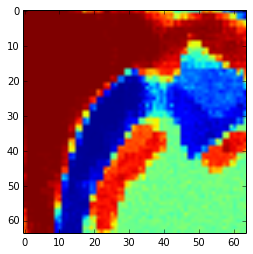

In [2]:
#C3
%matplotlib inline
from IPython.display import display
from matplotlib.pylab import *
from scipy.special import *

I=map(lambda v:transpose(array([v],dtype='float64')),[[0,0,0,0],[0,0,0,1],[0,0,1,0],[0,0,1,1],[0,1,0,0]])
O=map(lambda v:transpose(array([v],dtype='float64')),[[0,0,0,0],[0,0,0,1],[0,0,1,0],[0,1,0,0],[1,0,0,0]])

if True:
    HAu = normal(size=(64,64))
    HAs = ones(shape(HAu))

    HBu = zeros((64,1))
    HBs = ones(shape(HBu))
    
    GAu = normal(size=(64,64))
    GAs = ones(shape(GAu))

    GBu = zeros((64,1))
    GBs = ones(shape(GBu))

    OAu = normal(size=(1,64))
    OAs = ones(shape(OAu))

    OBu = zeros((1,1))
    OBs = ones(shape(OBu))

eps = 0.5
epoch = 2 ** 20

def delta(J, D, P):
    E = - J * ((D)/(P)-(1-D)/(1-P))
    NG = logical_or(isnan(E), isinf(E))
    E[NG] = 0
    return E

for k in range(epoch):
    X = zeros((64,1))
    Y = zeros((1,1))

    x = uniform()
    y = uniform()
    
    if 0.5 > x and 0.5 < y:
        continue
    
    for p in range(32):
        X[0+p,0] = p/32.0 < x
        X[32+p,0] = p/32.0 < y
    
#    Y[0,0] = 0.2 < sqrt((x-0.6)**2+(y-0.4)**2) and sqrt((x-0.6)**2+(y-0.4)**2) < 0.3
#    Y[0,0] = 2*(x-0.8)-0.2<(y-0.8)
#    Y[0,0] = float(not (fabs(x-0.5)<0.25 or fabs(y-0.5)<0.25))
#    Y[0,0] = float((x-0.5)*(y-0.5)<0)
    Y[0,0] = float(sin(8*pi*x*y)>0)
    
    HX = X
    HA = normal(size=shape(HAu))*HAs+HAu
    HB = normal(size=shape(HBu))*HBs+HBu
    
    HVu = dot(HAu,    HX   ) + HBu
    HVv = dot(HAs**2, HX**2) + HBs**2
    HVs = sqrt(HVv)
    
    HF = 0 < dot(HA, HX) + HB
    HP = 0.5 + 0.5 * erf(HVu/HVs/sqrt(2))
    
    GX = HF
    GA = normal(size=shape(GAu))*GAs+GAu
    GB = normal(size=shape(GBu))*GBs+GBu
    
    GVu = dot(GAu,    GX   ) + GBu
    GVv = dot(GAs**2, GX**2) + GBs**2
    GVs = sqrt(GVv)
    
    GF  = 0 < dot(GA, GX) + GB
    GP = 0.5 + 0.5 * erf(GVu/GVs/sqrt(2))
    
    OX = GF
    OA = normal(size=shape(OAu))*OAs+OAu
    OB = normal(size=shape(OBu))*OBs+OBu
    
    OVu = dot(OAu,    OX   ) + OBu
    OVv = dot(OAs**2, OX**2) + OBs**2
    OVs = sqrt(OVv)
    
    OF  = 0 < dot(OA, OX) + OB
    OP = 0.5 + 0.5 * erf(OVu/OVs/sqrt(2))
    
    OY = Y
    
    OJ = -exp(-(-OVu)**2/OVv/2.0)/sqrt(pi)/OVs/sqrt(2)
    OD = delta(OJ, OY, OP)
#    GY = maximum(0, minimum(1, GP + eps * dot(OA.T, OD)/64.0))
    GD = dot(OA.T, -OD)
#    GY = GF + eps * dot(OA.T, -OD)
    OAu = OAu + eps * (OD).dot(OX.T)
    OBu = OBu + eps * (OD)
    OAs = abs(OAs - eps * (OAs) * ((OD*OVu/OVv).dot(OX.T**2)))
    OBs = abs(OBs - eps * (OBs) * ((OD*OVu/OVv)))

    GJ = -exp(-(-GVu)**2/GVv/2.0)/sqrt(pi)/GVs/sqrt(2)
#    GD = delta(GJ, GY, GP)
    GD *= GJ
#    HY = 0.5 + 0.5 * sign(dot(GA.T, GY))
#    HY = maximum(0, minimum(1, HP + eps * dot(GA.T, GD)/64.0))
    HD = dot(GA.T, -GD)
#    HY = HF + eps * dot(GA.T, -GD)
    GAu = GAu + eps * (GD).dot(GX.T)
    GBu = GBu + eps * (GD)
    GAs = abs(GAs - eps * (GAs) * ((GD*GVu/GVv).dot(GX.T**2)))
    GBs = abs(GBs - eps * (GBs) * ((GD*GVu/GVv)))
    
    HJ = -exp(-(-HVu)**2/HVv/2.0)/sqrt(pi)/HVs/sqrt(2)
#    HD = delta(HJ, HY, HP)
    HD *= HJ
    HAu = HAu + eps * (HD).dot(HX.T)
    HBu = HBu + eps * (HD)
    HAs = abs(HAs - eps * (HAs) * ((HD*HVu/HVv).dot(HX.T**2)))
    HBs = abs(HBs - eps * (HBs) * ((HD*HVu/HVv)))
    
img = zeros((64,64))
for i in range(4096*16):
    k = i / 16
    w = k / 64
    h = k % 64
    x = w / 64.0
    y = h / 64.0
    
    for p in range(32):
        X[0+p,0] = p/32.0 < x
        X[32+p,0] = p/32.0 < y
    
    HX = X
    HA = normal(size=shape(HAu))*HAs+HAu
    HB = normal(size=shape(HBu))*HBs+HBu
    
    HVu = dot(HAu,    HX   ) + HBu
    HVv = dot(HAs**2, HX**2) + HBs**2
    HVs = sqrt(HVv)
    
    HF  = 0 < dot(HA, HX) + HB
    HP = 0.5 + 0.5 * erf(HVu/HVs/sqrt(2))
    
    GX = HF
    GA = normal(size=shape(GAu))*GAs+GAu
    GB = normal(size=shape(GBu))*GBs+GBu
    
    GVu = dot(GAu,    GX   ) + GBu
    GVv = dot(GAs**2, GX**2) + GBs**2
    GVs = sqrt(GVv)
    
    GF  = 0 < dot(GA, GX) + GB
    GP = 0.5 + 0.5 * erf(GVu/GVs/sqrt(2))
    
    OX = GF
    OA = normal(size=shape(OAu))*OAs+OAu
    OB = normal(size=shape(OBu))*OBs+OBu
    
    OVu = dot(OAu,    OX   ) + OBu
    OVv = dot(OAs**2, OX**2) + OBs**2
    OVs = sqrt(OVv)
    
    OF  = 0 < dot(OA, OX) + OB
    OP = 0.5 + 0.5 * erf(OVu/OVs/sqrt(2))
    
    img[w, h] += OP[0,0]

imshow(img)

/Users/Kota/Library/Python/2.7/lib/python/site-packages/ipykernel/__main__.py:33: RuntimeWarning: invalid value encountered in divide


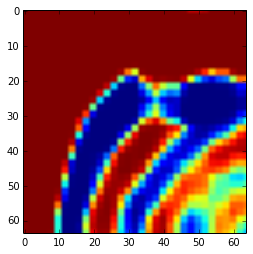

In [100]:
#C3
%matplotlib inline
from IPython.display import display
from matplotlib.pylab import *
from scipy.special import *

I=map(lambda v:transpose(array([v],dtype='float64')),[[0,0,0,0],[0,0,0,1],[0,0,1,0],[0,0,1,1],[0,1,0,0]])
O=map(lambda v:transpose(array([v],dtype='float64')),[[0,0,0,0],[0,0,0,1],[0,0,1,0],[0,1,0,0],[1,0,0,0]])

if True:
    HAu = normal(size=(64,64))
    HAs = ones(shape(HAu))

    HBu = zeros((64,1))
    HBs = ones(shape(HBu))
    
    GAu = normal(size=(64,64))
    GAs = ones(shape(GAu))

    GBu = zeros((64,1))
    GBs = ones(shape(GBu))

    OAu = normal(size=(1,64))
    OAs = ones(shape(OAu))

    OBu = zeros((1,1))
    OBs = ones(shape(OBu))

eps = 0.01
epoch = 2 ** 20

def delta(J, D, P):
    E = - J * ((D)/(P)-(1-D)/(1-P))
    NG = logical_or(isnan(E), isinf(E))
    E[NG] = 0
    return E

for k in range(epoch):
    X = zeros((64,1))
    Y = zeros((1,1))

    x = uniform()
    y = uniform()
    
    if 0.5 > x and 0.5 < y:
        continue
    
    for p in range(32):
        X[0+p,0] = p/32.0 < x
        X[32+p,0] = p/32.0 < y
    
#    Y[0,0] = 0.2 < sqrt((x-0.6)**2+(y-0.4)**2) and sqrt((x-0.6)**2+(y-0.4)**2) < 0.3
#    Y[0,0] = 2*(x-0.8)-0.2<(y-0.8)
#    Y[0,0] = float(not (fabs(x-0.5)<0.25 or fabs(y-0.5)<0.25))
#    Y[0,0] = float((x-0.5)*(y-0.5)<0)
#    Y[0,0] = float(sin(4*pi*x)>y)
    Y[0,0] = float(sin(8*pi*x*y)>0)
    
    HX = X
    HA = normal(size=shape(HAu))*0*HAs+HAu
    HB = normal(size=shape(HBu))*0*HBs+HBu
    
    HVu = dot(HAu,    HX   ) + HBu
    HVv = dot(HAs**2, HX**2) + HBs**2
    HVs = sqrt(HVv)
    
    HF = 0 < dot(HA, HX) + HB
    HP = 0.5 + 0.5 * erf(HVu/HVs/sqrt(2))
    
    GX = HP
    GA = normal(size=shape(GAu))*0*GAs+GAu
    GB = normal(size=shape(GBu))*0*GBs+GBu
    
    GVu = dot(GAu,    GX   ) + GBu
    GVv = dot(GAs**2, GX**2) + GBs**2
    GVs = sqrt(GVv)
    
    GF  = 0 < dot(GA, GX) + GB
    GP = 0.5 + 0.5 * erf(GVu/GVs/sqrt(2))
    
    OX = GP
    OA = normal(size=shape(OAu))*0*OAs+OAu
    OB = normal(size=shape(OBu))*0*OBs+OBu
    
    OVu = dot(OAu,    OX   ) + OBu
    OVv = dot(OAs**2, OX**2) + OBs**2
    OVs = sqrt(OVv)
    
    OF  = 0 < dot(OA, OX) + OB
    OP = 0.5 + 0.5 * erf(OVu/OVs/sqrt(2))
    
    OY = Y
    
    OJ = -exp(-(-OVu)**2/OVv/2.0)/sqrt(pi)/OVs/sqrt(2)
    OD = delta(OJ, OY, OP)
    GY = 0.5 + 0.5 * sign(dot(OA.T, OY))
    GD = dot(OA.T, -OD)
#    GY = GF + eps * dot(OA.T, -OD)
    OAu = OAu + eps * (OD).dot(OX.T)
    OBu = OBu + eps * (OD)
#    OAs = abs(OAs - eps * (OAs) * ((OD*OVu/OVv).dot(OX.T**2)))
#    OBs = abs(OBs - eps * (OBs) * ((OD*OVu/OVv)))

    GJ = -exp(-(-GVu)**2/GVv/2.0)/sqrt(pi)/GVs/sqrt(2)
#    GD = delta(GJ, GY, GP)
    GD *= GJ
    HY = 0.5 + 0.5 * sign(dot(GA.T, GY))
    HD = dot(GA.T, -GD)
    HY = HF + eps * dot(GA.T, -GD)
    GAu = GAu + eps * (GD).dot(GX.T)
    GBu = GBu + eps * (GD)
#    GAs = abs(GAs - eps * (GAs) * ((GD*GVu/GVv).dot(GX.T**2)))
#    GBs = abs(GBs - eps * (GBs) * ((GD*GVu/GVv)))
    
    HJ = -exp(-(-HVu)**2/HVv/2.0)/sqrt(pi)/HVs/sqrt(2)
#    HD = delta(HJ, HY, HP)
    HD *= HJ
    HAu = HAu + eps * (HD).dot(HX.T)
    HBu = HBu + eps * (HD)
#    HAs = abs(HAs - eps * (HAs) * ((HD*HVu/HVv).dot(HX.T**2)))
#    HBs = abs(HBs - eps * (HBs) * ((HD*HVu/HVv)))
    
img = zeros((64,64))
for i in range(4096*16):
    k = i / 16
    w = k / 64
    h = k % 64
    x = w / 64.0
    y = h / 64.0
    
    for p in range(32):
        X[0+p,0] = p/32.0 < x
        X[32+p,0] = p/32.0 < y
    
    HX = X
    HA = normal(size=shape(HAu))*0*HAs+HAu
    HB = normal(size=shape(HBu))*0*HBs+HBu
    
    HVu = dot(HAu,    HX   ) + HBu
    HVv = dot(HAs**2, HX**2) + HBs**2
    HVs = sqrt(HVv)
    
    HF  = 0 < dot(HA, HX) + HB
    HP = 0.5 + 0.5 * erf(HVu/HVs/sqrt(2))
    
    GX = HP
    GA = normal(size=shape(GAu))*0*GAs+GAu
    GB = normal(size=shape(GBu))*0*GBs+GBu
    
    GVu = dot(GAu,    GX   ) + GBu
    GVv = dot(GAs**2, GX**2) + GBs**2
    GVs = sqrt(GVv)
    
    GF  = 0 < dot(GA, GX) + GB
    GP = 0.5 + 0.5 * erf(GVu/GVs/sqrt(2))
    
    OX = GP
    OA = normal(size=shape(OAu))*0*OAs+OAu
    OB = normal(size=shape(OBu))*0*OBs+OBu
    
    OVu = dot(OAu,    OX   ) + OBu
    OVv = dot(OAs**2, OX**2) + OBs**2
    OVs = sqrt(OVv)
    
    OF  = 0 < dot(OA, OX) + OB
    OP = 0.5 + 0.5 * erf(OVu/OVs/sqrt(2))
    
    img[w, h] += OP[0,0]

imshow(img)

/Users/Kota/Library/Python/2.7/lib/python/site-packages/ipykernel/__main__.py:28: RuntimeWarning: invalid value encountered in divide
/Users/Kota/Library/Python/2.7/lib/python/site-packages/ipykernel/__main__.py:28: RuntimeWarning: divide by zero encountered in divide
/Users/Kota/Library/Python/2.7/lib/python/site-packages/ipykernel/__main__.py:28: RuntimeWarning: invalid value encountered in multiply


40955

array([[ 0.,  0.,  0.,  0.]])

array([[ 0.57798703,  0.        ,  0.15416058,  0.        ]])

40956

array([[ 0.,  0.,  0.,  1.]])

array([[  4.82470793e-01,   2.22044605e-16,   0.00000000e+00,
          9.94878241e-01]])

40957

array([[ 0.,  0.,  1.,  0.]])

array([[  4.62523116e-01,   1.33317542e-04,   9.97137076e-01,
          0.00000000e+00]])

40958

array([[ 0.,  1.,  0.,  0.]])

array([[  4.71111688e-01,   9.95223911e-01,   6.23429643e-05,
          0.00000000e+00]])

40959

array([[ 1.,  0.,  0.,  0.]])

array([[  5.69590612e-01,   0.00000000e+00,   0.00000000e+00,
          3.50300512e-06]])

array([[  1.00000000e+00,   1.18353163e-01,   1.20490023e-01,
          1.35713045e+00],
       [  1.00000000e+00,   1.76497378e-04,   2.88255601e+00,
          8.80400792e-04],
       [  1.00000000e+00,   1.69954818e+01,   7.81497596e-02,
          2.61155379e-01],
       [  1.00000000e+00,   8.17468763e-02,   5.78377909e-01,
          3.37846621e-35],
       [  1.00000000e+00,   2.11031398e-01,   2.03320165e+00,
          4.31904462e-91],
       [  1.00000000e+00,   3.39286623e-02,   2.66768417e+00,
          1.63356136e-01],
       [  1.00000000e+00,   5.00766603e+00,   6.91821762e-07,
          3.10746431e-04],
       [  1.00000000e+00,   5.47988266e+00,   1.35707734e-02,
          5.98445241e-02]])

array([[  0.378016  ],
       [  1.98502852],
       [ 23.2634821 ],
       [  1.25157171],
       [  0.30900416],
       [  1.69983033],
       [  1.06600278],
       [  2.82994856]])

array([[  4.42335580e+01,   5.01649357e-01,   1.38656028e-01,
          1.37494317e-01,   1.53890240e+00,   6.66556602e-01,
          1.80887326e+01,   3.86265857e+01],
       [  4.53043514e-02,   2.73526020e-01,   7.38521309e-02,
          4.84459785e-02,   4.34959163e-02,   2.43469305e+00,
          7.11625607e-04,   6.76603366e-02],
       [  3.87485746e-02,   3.50289522e+01,   9.16779109e-03,
          9.19293587e-02,   2.16406727e-01,   6.18750097e-01,
          2.63811287e+00,   5.60957430e-02],
       [  1.65438237e-02,   9.94468637e-02,   2.03658414e-01,
          3.98554156e-01,   8.30064599e-02,   7.07561818e-01,
          4.49443129e-02,   2.16537170e+00]])

array([[ 393.40234206],
       [   2.1283763 ],
       [   0.40973467],
       [   1.6334964 ]])

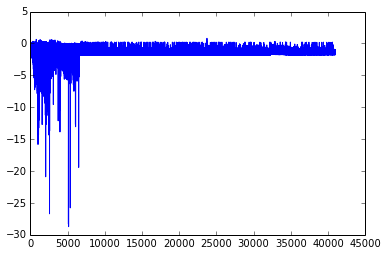

In [93]:
#プロトタイプ 2層
%matplotlib inline
from IPython.display import display
from matplotlib.pylab import *
from scipy.special import *

I=map(lambda v:transpose(array([v],dtype='float64')),[[0,0,0,0],[0,0,0,1],[0,0,1,0],[0,0,1,1],[0,1,0,0]])
O=map(lambda v:transpose(array([v],dtype='float64')),[[0,0,0,0],[0,0,0,1],[0,0,1,0],[0,1,0,0],[1,0,0,0]])

if True:
    HAu = normal(size=(8,4))
    HAs = ones(shape(HAu))

    HBu = zeros((8,1))
    HBs = ones(shape(HBu))

    OAu = normal(size=(4,8))
    OAs = ones(shape(OAu))

    OBu = zeros((4,1))
    OBs = ones(shape(OBu))

eps = 0.3
err = []
epoch = 5 * ( 2 ** 13 )

def delta(J, D, P):
    E = - J * ((D)/(P)-(1-D)/(1-P))
    NG = logical_or(isnan(E), isinf(E))
    E[NG] = 0
    return E

for k in range(epoch):
    X = I[ k % 5 ]
    Y = O[ k % 5 ]
    
    HX = X
    HA = normal(size=shape(HAu))*HAs+HAu
    HB = normal(size=shape(HBu))*HBs+HBu
    
    HVu = dot(HAu,    HX   ) + HBu
    HVv = dot(HAs**2, HX**2) + HBs**2
    HVs = sqrt(HVv)
    
    HF  = 0 < dot(HA, HX) + HB
    HP = 0.5 + 0.5 * erf(HVu/HVs/sqrt(2))
    
    OX = HF
    OA = normal(size=shape(OAu))*OAs+OAu
    OB = normal(size=shape(OBu))*OBs+OBu
    
    OVu = dot(OAu,    OX   ) + OBu
    OVv = dot(OAs**2, OX**2) + OBs**2
    OVs = sqrt(OVv)
    
    OF  = 0 < dot(OA, OX) + OB
    OP = 0.5 + 0.5 * erf(OVu/OVs/sqrt(2))
    
    OY = Y    
    E = OY - OP
    
    OJ = -exp(-(-OVu)**2/OVv/2.0)/sqrt(pi)/OVs/sqrt(2)
    OD = delta(OJ, OY, OP)
    HY = 0.5 + 0.5 * sign(dot(OA.T, OY))
    OAu = OAu + eps * (OD).dot(OX.T)
    OBu = OBu + eps * (OD)
    OAs = abs(OAs - eps * (OAs) * ((OD*OVu/OVv).dot(OX.T**2)))
    OBs = abs(OBs - eps * (OBs) * ((OD*OVu/OVv)))
    
    HJ = -exp(-(-HVu)**2/HVv/2.0)/sqrt(pi)/HVs/sqrt(2)
    HD = delta(HJ, HY, HP)
    HAu = HAu + eps * (HD).dot(HX.T)
    HBu = HBu + eps * (HD)
    HAs = abs(HAs - eps * (HAs) * ((HD*HVu/HVv).dot(HX.T**2)))
    HBs = abs(HBs - eps * (HBs) * ((HD*HVu/HVv)))
    
    err.append(dot(E.T, E)[0])
    if k > epoch - 6:
        display(k, Y.T, OP.T)
    
display(HAs,HBs,OAs,OBs)
plot(log(err))